# Week 9: Gradient Boost
This notebook explores the performance of the Gradient Boosting classifier on the Beth, UNSW, and Attacks datasets. We will examine the effects of learning rate, number of estimators, tree depth, and regularization on model performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Load the Datasets

In [3]:
beth_df = pd.read_csv('datasets/beth.csv')
unsw_df = pd.read_csv('datasets/unsw.csv')
attacks_df = pd.read_csv('datasets/cyber.csv')

## Preprocessing

In [4]:
# Subsampling
beth_df = beth_df.sample(frac=0.1, random_state=42)

drop_beth = ['target']
drop_unsw = ['target_multiclass', 'attack_cat', 'target_binary', 'label']
drop_attacks = ['target_multiclass', 'target_binary']

# Define features and target variables
X_beth = beth_df.drop(columns=drop_beth)
y_beth = beth_df['target']

X_unsw = unsw_df.drop(columns=drop_unsw).select_dtypes(include=[np.number])
y_unsw = unsw_df['target_binary']

X_attacks = attacks_df.drop(columns=drop_attacks).select_dtypes(include=[np.number])
y_attacks = attacks_df['target_binary']

# Train-test split
X_beth_train, X_beth_test, y_beth_train, y_beth_test = train_test_split(X_beth, y_beth, test_size=0.3, random_state=42)
X_unsw_train, X_unsw_test, y_unsw_train, y_unsw_test = train_test_split(X_unsw, y_unsw, test_size=0.3, random_state=42)
X_attacks_train, X_attacks_test, y_attacks_train, y_attacks_test = train_test_split(X_attacks, y_attacks, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_beth_train_scaled = scaler.fit_transform(X_beth_train)
X_beth_test_scaled = scaler.transform(X_beth_test)
X_unsw_train_scaled = scaler.fit_transform(X_unsw_train)
X_unsw_test_scaled = scaler.transform(X_unsw_test)
X_attacks_train_scaled = scaler.fit_transform(X_attacks_train)
X_attacks_test_scaled = scaler.transform(X_attacks_test)

## Default Gradient Boosting Classifier

### Beth Dataset
Accuracy: 0.9981217992892564
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65540
           1       0.99      0.99      0.99      8174
           2       1.00      1.00      1.00       293

    accuracy                           1.00     74007
   macro avg       1.00      1.00      1.00     74007
weighted avg       1.00      1.00      1.00     74007



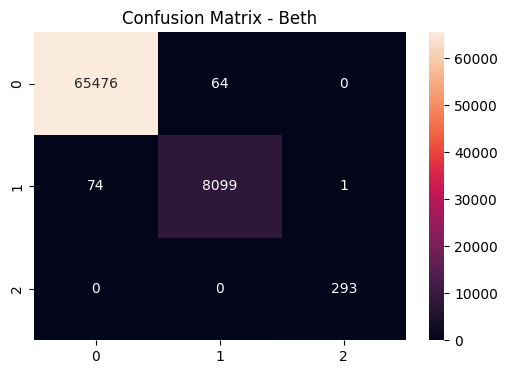

### UNSW Dataset
Accuracy: 0.9695997516235026
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     28026
           1       0.97      0.98      0.98     49276

    accuracy                           0.97     77302
   macro avg       0.97      0.97      0.97     77302
weighted avg       0.97      0.97      0.97     77302



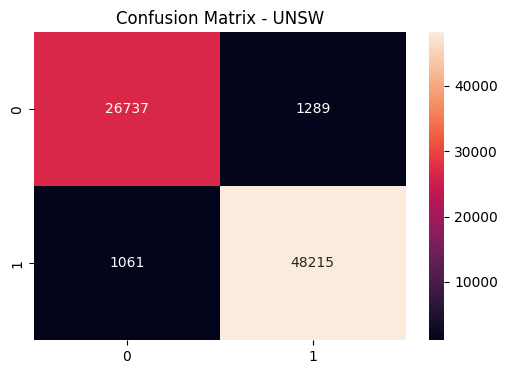

### Attacks Dataset
Accuracy: 0.7790833333333333
              precision    recall  f1-score   support

           0       0.14      0.00      0.00      2646
           1       0.78      1.00      0.88      9354

    accuracy                           0.78     12000
   macro avg       0.46      0.50      0.44     12000
weighted avg       0.64      0.78      0.68     12000



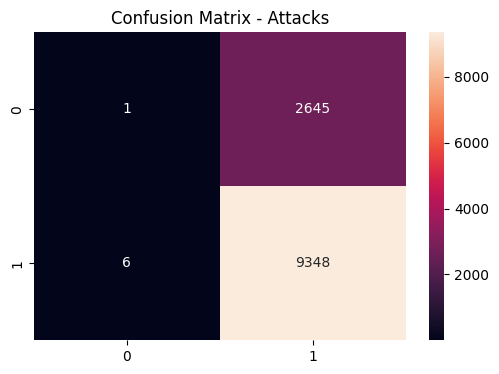

In [5]:
datasets = {
    'Beth': (X_beth_train_scaled, y_beth_train, X_beth_test_scaled, y_beth_test),
    'UNSW': (X_unsw_train_scaled, y_unsw_train, X_unsw_test_scaled, y_unsw_test),
    'Attacks': (X_attacks_train_scaled, y_attacks_train, X_attacks_test_scaled, y_attacks_test)
}

for name, (X_train, y_train, X_test, y_test) in datasets.items():
    print(f'### {name} Dataset')
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

## Hyperparameter Tuning



In [ ]:
# Define param grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [1.0, 0.8]
}

# Store data in a dictionary
datasets = {
    'Beth': (X_beth_train_scaled, y_beth_train, X_beth_test_scaled, y_beth_test),
    'UNSW': (X_unsw_train_scaled, y_unsw_train, X_unsw_test_scaled, y_unsw_test),
    'Attacks': (X_attacks_train_scaled, y_attacks_train, X_attacks_test_scaled, y_attacks_test),
}

# Store best models
best_models = {}

# Loop through each dataset
for name, (X_train, y_train, X_test, y_test) in datasets.items():
    print(f"### Grid Search for {name} Dataset")
    
    grid = GridSearchCV(
        GradientBoostingClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    
    print('Best Parameters:', grid.best_params_)
    best_model = grid.best_estimator_
    best_models[name] = best_model  # store the model
    
    y_pred_best = best_model.predict(X_test)
    print('Best Model Accuracy:', accuracy_score(y_test, y_pred_best))
    print(classification_report(y_test, y_pred_best))
    
    # Plotting Grid Search Results
    results = pd.DataFrame(grid.cv_results_)
    pivot = results.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')
    pivot.plot(marker='o')
    plt.title(f'{name} - Learning Rate vs Estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('CV Accuracy')
    plt.show()

## Conclusion
This notebook demonstrates how Gradient Boosting can be applied to classification problems. We examined the impact of key hyperparameters including learning rate, number of estimators, tree depth, and regularization via subsampling. Hyperparameter tuning improved performance over the default model. Use this framework for further experiments.